In [24]:
# Importing necessary libraries for the task
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Set up the plot size for better viewing
plt.rcParams['figure.figsize'] = [15, 10]

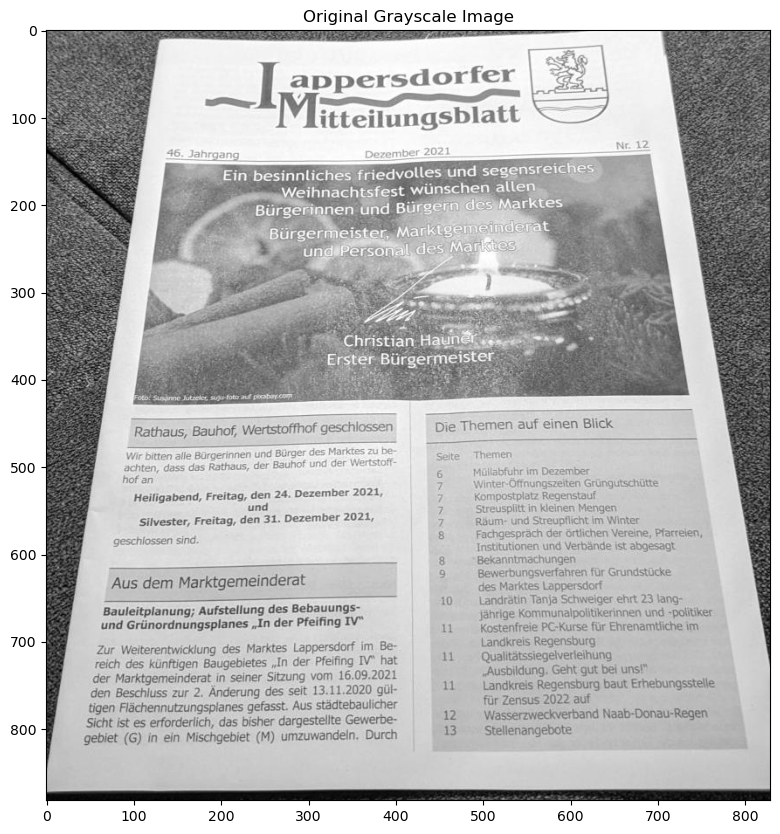

In [25]:
# Let's try loading the document image and immediately convert it to grayscale.
img = cv2.imread('img/document.jpg') 
if img is None:
    print("The image file was not found. Check the path and try again.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.show()

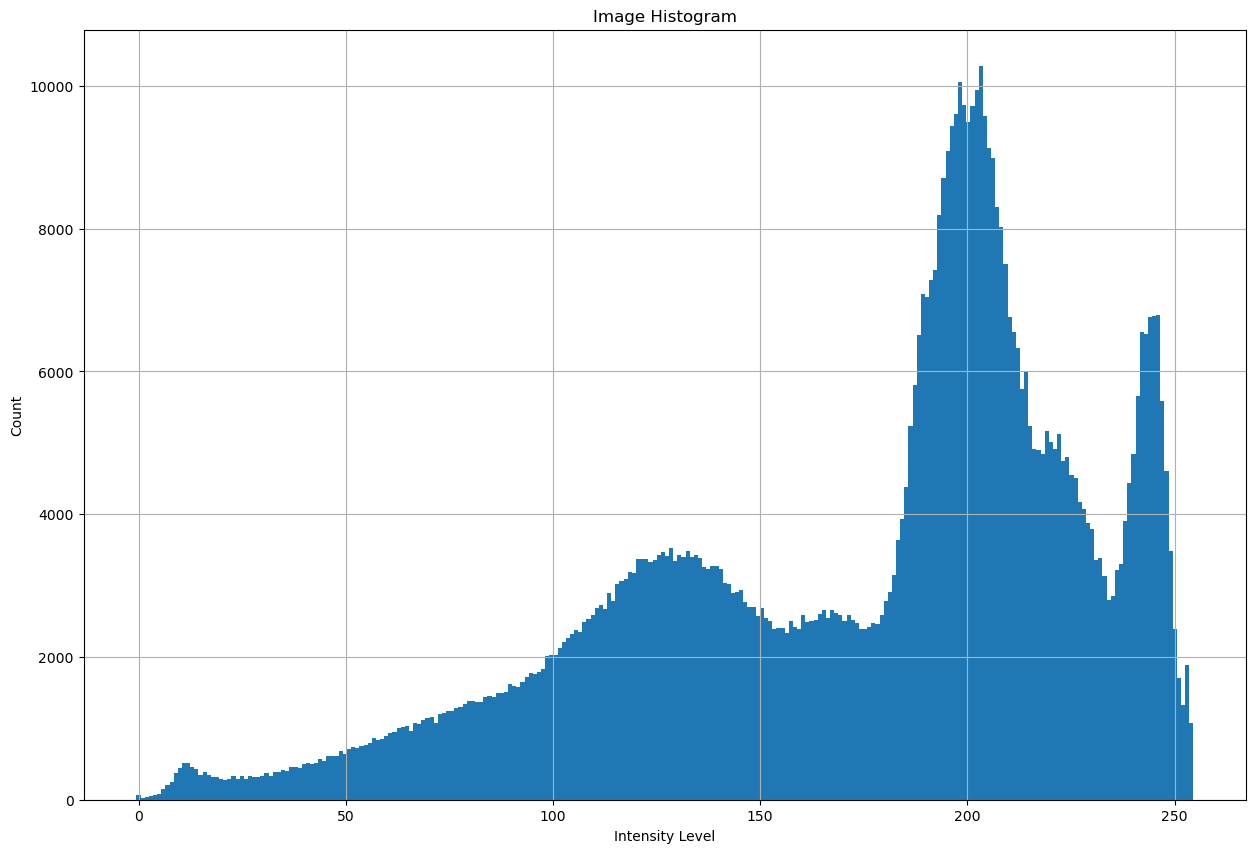

In [26]:
# Generate and display the histogram to see pixel intensity distribution.
h = np.histogram(img, bins=256)
plt.bar(h[1][0:-1], h[0], width=1)
plt.xlabel('Intensity Level')
plt.ylabel('Count')
plt.title("Image Histogram")
plt.grid(True)
plt.show()

In [27]:
# Set up Otsu's algorithm parameters and start brute force searching for the best threshold.
# This threshold will separate foreground and background for better document binarization.

# Get image dimensions
rows, cols = img.shape

# Compute the total amount of image pixels
num_pixels = rows * cols

# Initializing variables for finding the optimal threshold
best_wcv = 1e6  # Best within-class variance
opt_th = None   # Threshold corresponding to the best wcv

In [28]:
# This will loop through all possible threshold values to find the one with the lowest variance.

for th in range(0, 256):
    # Extract pixels for foreground and background based on the threshold
    foreground = img[img >= th]
    background = img[img < th]
    
    # Skip if either foreground or background is empty
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class weights (probability) for foreground and background
    omega_f = len(foreground) / num_pixels
    omega_b = len(background) / num_pixels
    
    # Compute variances for foreground and background
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    
    # Calculate within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b
    
    # Update best within-class variance and optimal threshold
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th

# Display the optimal threshold
print('Optimal threshold found by Otsu:', opt_th)

Optimal threshold found by Otsu: 160


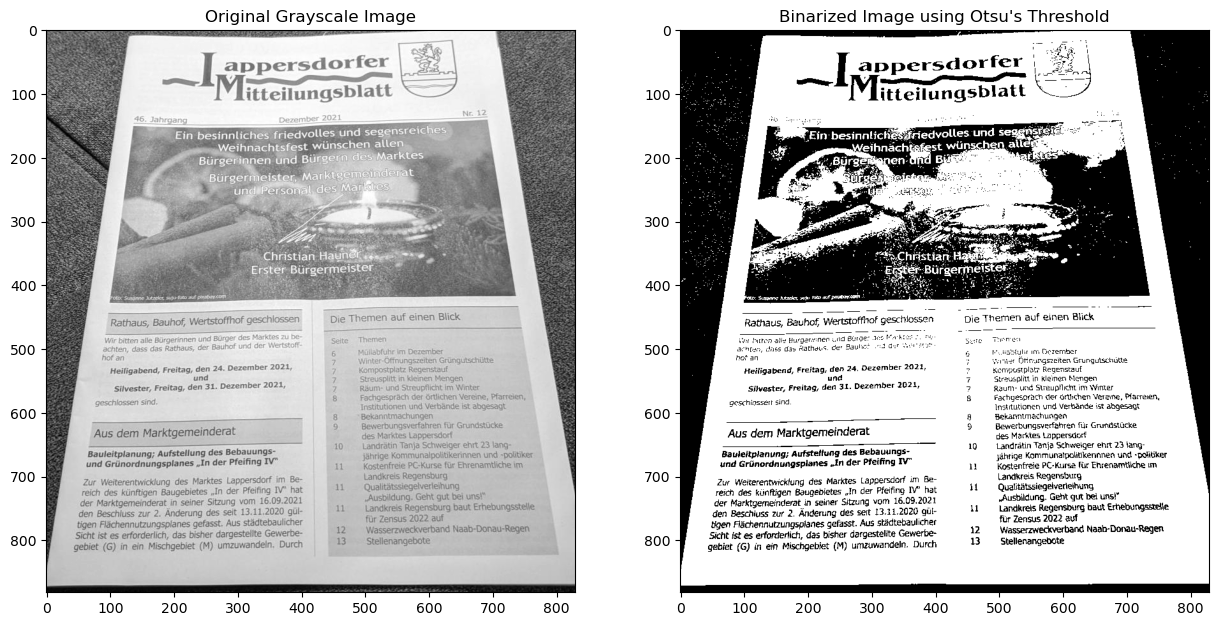

In [29]:
# Let's compare the original image with its binarized version using the optimal threshold.

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Grayscale Image")

plt.subplot(1, 2, 2)
plt.imshow(img > opt_th, cmap='gray')
plt.title("Binarized Image using Otsu's Threshold")
plt.show()

# Questions

### Q1: Looking at the computed histogram, could it be considered bimodal?
A1: Yes, if we see two distinct peaks in the histogram, that would make it bimodal. This usually means that the image has two main pixel intensity groups, like text and background, which is great for thresholding since it helps us separate those parts effectively.

### Q2: Looking at the computed histogram, what binarization threshold would you choose? Why?
A2: I’d go with a threshold around the valley between the two peaks. This spot usually marks the dividing line between background and text. It’s a balanced choice because it captures the darker text while ignoring the lighter background.

### Q3: Looking at the resulting (thresholded) image, is the text binarization (detection) good?
A3: If the text stands out sharply from the background with minimal noise, then the binarization did its job well! Sometimes, though, it might miss faint or noisy areas, which would mean a little tweaking is necessary to get everything just right.